# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2383 Жданов Антон Константинович и Ильин Павел Олегович. Вариант №13.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения


#### 1. Полиномиальное сглаживание дискретных сигналов

**Полиномиальное сглаживание** — это метод аппроксимации дискретного сигнала на ограниченном интервале точками полинома степени $m$ с целью уменьшения шумовых колебаний при сохранении основной формы сигнала.

Для каждого дискретного отсчёта $n$ исходная последовательность $x(n)$ аппроксимируется полиномом вида:

$$
y(n) = a_0 + a_1 n + a_2 n^2 + \dots + a_m n^m,
$$

где $a_i$ — коэффициенты полинома, определяемые методом наименьших квадратов по окну длины $N$.

Цель — подобрать такие коэффициенты $a_i$, чтобы минимизировать невязку:

$$
\sum_{k=-K}^{K} [x(n+k) - y(n+k)]^2 \rightarrow \min,
$$

где $N = 2K + 1$ — количество точек сглаживания.



#### 2. Полиномиальные фильтры как нерекурсивные FIR-фильтры

Результат полиномиального сглаживания можно представить в виде линейной свёртки входного сигнала $x(n)$ с импульсной характеристикой $h(k)$:

$$
y(n) = \sum_{k=-K}^{K} h(k) \, x(n-k),
$$

где $h(k)$ — импульсная характеристика фильтра, $N = 2K + 1$ — длина окна усреднения.  
Такой фильтр является **нерекурсивным (FIR)** и **симметричным**, поэтому он обладает **линейной фазой**.



#### 3. Передаточная функция и частотная характеристика

**Передаточная функция** (или частотная характеристика) дискретного фильтра выражается как:

$$
H(e^{j\omega}) = \sum_{k=-K}^{K} h(k) e^{-j\omega k},
$$

где $\omega$ — нормированная угловая частота ($0 \leq \omega \leq \pi$).  
Модуль $|H(e^{j\omega})|$ определяет амплитудно-частотную характеристику (АЧХ) фильтра.



#### 4. Усредняющий фильтр (сглаживание прямой линией)

Наиболее простой вариант полиномиального сглаживания — **усреднение по $N$ точкам**.  
Импульсная характеристика имеет вид:

$$
h(k) = \frac{1}{N}, \quad k = 0, 1, \dots, N-1.
$$

Частотная характеристика для такого фильтра определяется выражением:

$$
H(e^{j\omega}) = \frac{\sin(N\omega/2)}{N \sin(\omega/2)} e^{-j\omega(N-1)/2}.
$$

Модуль этой функции имеет форму, аналогичную функции типа sinc, что указывает на низкочастотный характер фильтра.



#### 5. Полиномиальные фильтры более высоких порядков

Для сглаживания сигналов с более сложной структурой применяются фильтры, основанные на аппроксимации полиномами степеней $m > 1$.

- **Первый порядок (линейный фильтр)** — минимизирует случайные флуктуации, но может смещать пики сигнала.  
- **Второй порядок (квадратичный фильтр)** — сохраняет тренды и плавные изменения сигнала.  
- **Четвёртый порядок** — способен точнее аппроксимировать нелинейные участки сигнала, но обладает более сложной частотной характеристикой.



#### 6. Фильтры по формулам Спенсера

**Формулы Спенсера** представляют собой специальные весовые схемы для дискретного сглаживания, основанные на симметричных коэффициентах, обеспечивающих минимизацию искажений низкочастотных компонентов при подавлении высокочастотных шумов.

Пример фильтра Спенсера для $N=15$:

$$
h = \frac{1}{320} [-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3].
$$

Такие фильтры обеспечивают хорошее компромиссное соотношение между степенью сглаживания и сохранением формы сигнала.



#### 7. Частотные свойства фильтров

- **Полоса пропускания** — диапазон частот, которые проходят через фильтр без существенного ослабления.  
- **Полоса подавления** — диапазон частот, которые фильтр подавляет.  
- Увеличение $N$ (длины окна сглаживания) сужает полосу пропускания, делая фильтр более "медленным" и усиливая сглаживание.  
- Увеличение порядка полинома $m$ позволяет лучше сохранять форму сигнала, но снижает устойчивость к шуму.



#### 8. Анализ в логарифмической шкале (дБ)

Для оценки эффективности фильтрации часто используют логарифмическое представление амплитудной характеристики:

$$
H_{dB}(\omega) = 20 \log_{10} |H(e^{j\omega})|.
$$

В этом масштабе легче оценить глубину подавления высоких частот и поведение фильтра в области перехода между полосой пропускания и полосой подавления.




## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $~H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

# Выполнение работы


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

 ## 1. Сглаживание прямой линией (полином 1-й степени)

Передаточная функция нерекурсивного фильтра при аппроксимации прямой линией через $M$ точек может быть записана как:

$$
H(e^{j\omega}) = \sum_{n=-k}^{k} h_n e^{-j\omega n}
$$

где $h_n$ — коэффициенты фильтра, полученные методом наименьших квадратов при аппроксимации линейным полиномом.
Для сглаживания прямой линией:
- при 3 точках: $h = [1/3, 1/3, 1/3]$
- при 5 точках: $h = [1/5, 1/5, 1/5, 1/5, 1/5]$
- при 7 точках: $h = [1/7, ..., 1/7]$
- при 9 точках: $h = [1/9, ..., 1/9]$


Пусть выходной сигнал аппроксимируемой прямой записан как
$$
y(t)=A+Bt.
$$

В узлах $t=k$ для $k=-1,0,1$ имеем приближения $y_k=A+B k$. Пусть задано три сэмпла $s_{-1}, s_0, s_1$. Выберем параметры $A,B$ по критерию наименьших квадратов — минимизируем
$$
F(A,B)=\sum_{k=-1}^{1}(s_k - A - Bk)^2.
$$

Вычислим частные производные и приравняем нулю:

1) По $A$:
$$
\frac{\partial F}{\partial A}=-2\sum_{k=-1}^{1} (s_k - A - Bk)=0
\quad\Longrightarrow\quad
\sum_{k=-1}^{1} s_k - 3A - B\sum_{k=-1}^{1} k = 0.
$$
Так как $\sum_{k=-1}^{1} k = (-1)+0+1=0$, получаем
$$
3A=\sum_{k=-1}^{1} s_k
\quad\Longrightarrow\quad
A=\frac{1}{3}\big(s_{-1}+s_0+s_1\big).
$$

2) По $B$:
$$
\frac{\partial F}{\partial B}=-2\sum_{k=-1}^{1} k (s_k - A - Bk)=0
$$
что даёт
$$
\sum_{k=-1}^{1} k s_k - A\sum_{k=-1}^{1} k - B\sum_{k=-1}^{1} k^2 = 0.
$$
Опять $\sum_{k=-1}^{1} k=0$, а $\sum_{k=-1}^{1} k^2 = (-1)^2+0^2+1^2 = 2$, поэтому
$$
2B=\sum_{k=-1}^{1} k s_k \quad\Longrightarrow\quad
B=\frac{1}{2}\big(-s_{-1}+0\cdot s_0 + s_1\big)=\frac{s_1 - s_{-1}}{2}.
$$

Итак, оптимальные параметры:
$$
A=\frac{s_{-1}+s_0+s_1}{3},\qquad
B=\frac{s_1-s_{-1}}{2}.
$$

Нас интересует значение аппроксимации в центральной точке $t=0$: это просто
$$
y_0=A=\frac{s_{-1}+s_0+s_1}{3}.
$$
То есть аппроксимация прямой в центре эквивалентна простому скользящему среднему по трём точкам. (Причина: симметрия индексов обнуляет вклад коэффициента наклона $B$ в центральную точку.)

Запишем это как свёртку с ядром:
$$
y_n = \frac{1}{3}(s_{n-1}+s_n+s_{n+1}),
$$
т.е. коэффициенты фильтра
$$
h = \bigg[\tfrac{1}{3},\ \tfrac{1}{3},\ \tfrac{1}{3}\bigg].
$$

Частотный анализ. Подставим гармонический вход $s_n=e^{i\omega n}$. Тогда
\begin{align*}
y_n &= \frac{1}{3}\big(e^{i\omega(n-1)} + e^{i\omega n} + e^{i\omega(n+1)}\big)
     = \Big(\frac{1}{3}\big(e^{-i\omega}+1+e^{i\omega}\big)\Big)e^{i\omega n}\\
&= H(\omega)\,e^{i\omega n}.
\end{align*}
Отсюда передаточная функция
$$
H(\omega)=\frac{1}{3}\big(e^{-i\omega}+1+e^{i\omega}\big)
=\frac{1}{3}\big(1+2\cos\omega\big).
$$

Можно также записать $H(\omega)$ в виде суммы геометрической прогрессии:
$$
H(\omega)=\frac{1}{3}e^{-i\omega}\frac{1-e^{i3\omega}}{1-e^{i\omega}}
= \frac{1}{3}e^{-i\omega}\cdot\frac{\sin(3\omega/2)}{\sin(\omega/2)}\cdot e^{i\omega},
$$
откуда модуль
$$
|H(\omega)|=\frac{1}{3}\left|\frac{\sin\!\left(\tfrac{3\omega}{2}\right)}{\sin\!\left(\tfrac{\omega}{2}\right)}\right|.
$$

Для 5 точек:

$$
H(w) = \frac{1}{5} (e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw}) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))
$$

Для 7 точек:

$$
H(w) = \frac{1}{7} (e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw}) = \frac{1}{7} (1 + 2cos(w) + 2cos(2w) + 2cos(3w))
$$

Для 9 точек:

$$
H(w) = \frac{1}{9} (e^{-4iw} + e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw} + e^{4iw}) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))
$$

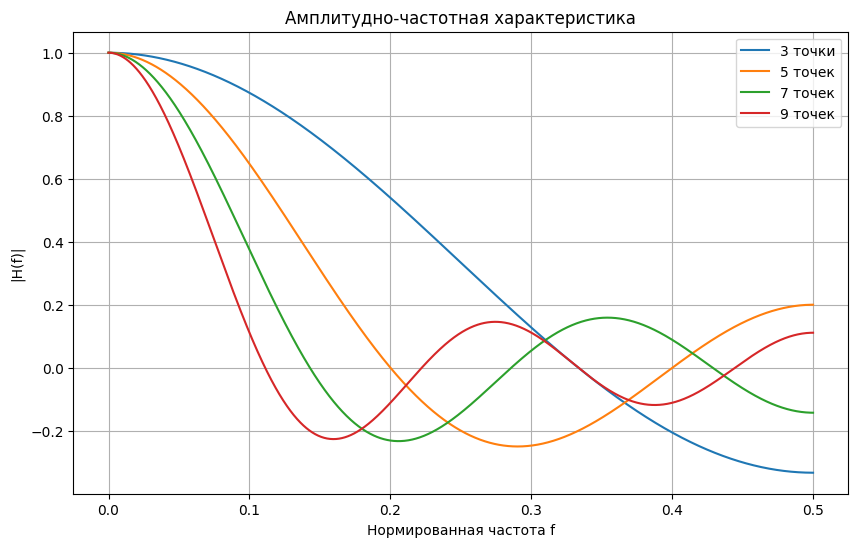

In [2]:
F = np.arange(0.0, 0.5, 0.0003)
W = 2 * np.pi * F

H3  = (1/3) * (1 + 2*np.cos(W))
H5  = (1/5) * (1 + 2*np.cos(W) + 2*np.cos(2*W))
H7  = (1/7) * (1 + 2*np.cos(W) + 2*np.cos(2*W) + 2*np.cos(3*W))
H9  = (1/9) * (1 + 2*np.cos(W) + 2*np.cos(2*W) + 2*np.cos(3*W) + 2*np.cos(4*W))

Hs_1 = np.vstack([H3, H5, H7, H9])
labels_1 = ['3 точки', '5 точек', '7 точек', '9 точек']

plt.figure(figsize=(10, 6))
for H, label in zip(Hs_1, labels_1):
    plt.plot(F, H, label=label)

plt.title("Амплитудно-частотная характеристика")
plt.xlabel("Нормированная частота f")
plt.ylabel("|H(f)|")
plt.grid(True)
plt.legend()
plt.show()

## 2. Сглаживание полиномом второй степени

Фильтр второго порядка вычисляется из задачи аппроксимации полиномом степени 2 на окне $M$.  
Передаточная функция:
$$
H(e^{j\omega}) = \sum_{n=-k}^{k} h_n e^{-j\omega n}
$$

Коэффициенты фильтра определяются решением системы нормальных уравнений метода наименьших квадратов.


Полином 2 степени сохраняет низкие частоты и меньше искажает форму сигнала, чем простое усреднение, но хуже подавляет шум на высоких частотах.

 Вывод для 7-точечного квадратичного аппроксимационного фильтра

Рассматриваем аппроксимацию квадратичной функцией
$$
y(t)=A+Bt+Ct^2
$$
в окне $k=-3,\dots,3$. Для заданных сэмплов $s_k$ минимизируем сумму квадратов ошибок
$$
F(A,B,C)=\sum_{k=-3}^{3}\big(s_k - A - Bk - Ck^2\big)^2.
$$

Нормальные уравнения (производные по $A,B,C$ равны нулю):
$$
\begin{cases}
\displaystyle\sum_{k=-3}^{3} (s_k - A - Bk - Ck^2)=0,\\[6pt]
\displaystyle\sum_{k=-3}^{3} k(s_k - A - Bk - Ck^2)=0,\\[6pt]
\displaystyle\sum_{k=-3}^{3} k^2(s_k - A - Bk - Ck^2)=0.
\end{cases}
$$

Воспользуемся известными суммами по симметричному набору индексов:
$$
\sum_{k=-3}^3 1 = 7,\quad
\sum_{k=-3}^3 k = 0,\quad
\sum_{k=-3}^3 k^2 = 28,\quad
\sum_{k=-3}^3 k^3 = 0,\quad
\sum_{k=-3}^3 k^4 = 196.
$$

Введём компактно
$$
S_0=\sum_{k=-3}^3 s_k,\qquad
S_1=\sum_{k=-3}^3 k s_k,\qquad
S_2=\sum_{k=-3}^3 k^2 s_k.
$$

Тогда система принимает вид
$$
\begin{cases}
7A + 28C = S_0,\\[4pt]
28B = S_1,\\[4pt]
28A + 196C = S_2.
\end{cases}
$$

Решаем: сначала
$$
B=\frac{S_1}{28}.
$$
Вычитая 4·(первое уравнение) из третьего:
$$
84C = S_2 - 4S_0 \quad\Longrightarrow\quad C=\frac{S_2-4S_0}{84}.
$$
Подставляя в первое:
$$
7A = S_0 - 28C = \frac{7S_0 - S_2}{3} \quad\Longrightarrow\quad
A=\frac{7S_0 - S_2}{21}.
$$

Развернём $S_0$ и $S_2$ по отдельным сэмплам:
$$
S_0 = s_{-3}+s_{-2}+s_{-1}+s_0+s_1+s_2+s_3,
$$
$$
S_2 = 9s_{-3}+4s_{-2}+1s_{-1}+0\cdot s_0+1s_1+4s_2+9s_3.
$$

Подставка даёт явную формулу для значения в центре $y_0=A$:
$$
\boxed{\,y_0 = A = \frac{1}{21}\big(-2s_{-3} + 3s_{-2} + 6s_{-1} + 7s_0 + 6s_1 + 3s_2 - 2s_3\big)\,}.
$$

Таким образом коэффициенты свёртки (ядро фильтра) для получения $y_0$:
$$
h = \frac{1}{21}\big[-2,\ 3,\ 6,\ 7,\ 6,\ 3,\ -2\big].
$$

Частотная характеристика (для гармонического входа $s_n=e^{i\omega n}$):
$$
H(\omega)=\frac{1}{21}\big(-2e^{-3i\omega}+3e^{-2i\omega}+6e^{-i\omega}+7+6e^{i\omega}+3e^{2i\omega}-2e^{3i\omega}\big).
$$
Эквивалентное вещественное выражение:
$$
\boxed{\,H(\omega)=\frac{1}{21}\big(7 + 12\cos\omega + 6\cos 2\omega - 4\cos 3\omega\big)\, }.
$$


Для 9 точек:

$$
H(w) = \frac{1}{231} (59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w))
$$

Для 11 точек:

$$
H(w) = \frac{1}{429} (89 + 168cos(w) + 138cos(2w) + 88cos(3w) + 18cos(4w) - 72cos(5w))
$$

Для 13 точек:

$$
H(w) = \frac{1}{143} (25 + 48cos(w) + 42cos(2w) + 32cos(3w) + 18cos(4w) - 22cos(6w))
$$

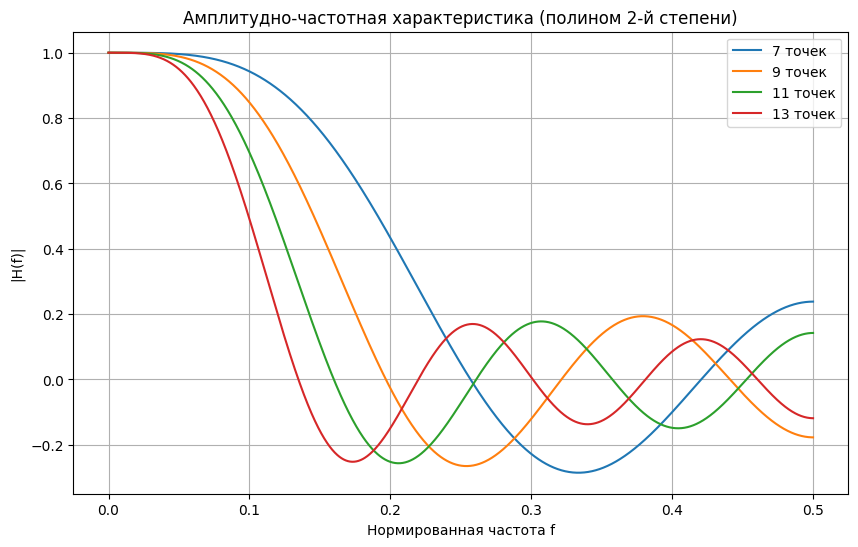

In [3]:
F = np.arange(0.0, 0.5, 0.0003)
W = 2 * np.pi * F

H7  = (1/21)  * (7  + 12 * np.cos(W) + 6  * np.cos(2*W) - 4  * np.cos(3*W))
H9  = (1/231) * (59 + 108 * np.cos(W) + 78 * np.cos(2*W) + 28 * np.cos(3*W) - 42 * np.cos(4*W))
H11 = (1/429) * (89 + 168 * np.cos(W) + 138 * np.cos(2*W) + 88 * np.cos(3*W) + 18 * np.cos(4*W) - 72 * np.cos(5*W))
H13 = (1/143) * (25 + 48  * np.cos(W) + 42  * np.cos(2*W) + 32  * np.cos(3*W) + 18 * np.cos(4*W) - 22 * np.cos(6*W))

Hs_2 = np.vstack([H7, H9, H11, H13])
labels_2 = ['7 точек', '9 точек', '11 точек', '13 точек']

plt.figure(figsize=(10, 6))
for H, label in zip(Hs_2, labels_2):
    plt.plot(F, H, label=label)

plt.title("Амплитудно-частотная характеристика (полином 2-й степени)")
plt.xlabel("Нормированная частота f")
plt.ylabel("|H(f)|")
plt.grid(True)
plt.legend()
plt.show()

## 3. Сглаживание полиномом четвертой степени

Полином 4 степени лучше сохраняет форму сигнала, но имеет менее выраженное подавление высоких частот.

Аппроксимируем локально сигнал полиномом 4-й степени:
$$
y(t)=A + Bt + Ct^2 + Dt^3 + Et^4.
$$

В окне $k=-4,\dots,4$ (9 точек) задаём сэмплы $s_k$ и выбираем параметры $A,B,C,D,E$ по критерию наименьших квадратов, минимизируя
$$
F(A,B,C,D,E)=\sum_{k=-4}^{4}\big(s_k - A - Bk - Ck^2 - Dk^3 - E k^4\big)^2.
$$

Нормальные уравнения получаются при приравнивании к нулю частных производных по $A,B,C,D,E$.

---

Необходимые суммы по индексам

Для $k=-4,\dots,4$ используем, что нечётные степени сумм дают 0:
$$
\begin{aligned}
&\sum_{k=-4}^{4}1 = 9, &\quad& \sum_{k=-4}^{4}k = 0,\\
&\sum_{k=-4}^{4}k^2 = 60, &\quad& \sum_{k=-4}^{4}k^3 = 0,\\
&\sum_{k=-4}^{4}k^4 = 708, &\quad& \sum_{k=-4}^{4}k^5 = 0,\\
&\sum_{k=-4}^{4}k^6 = 9780, &\quad& \sum_{k=-4}^{4}k^7 = 0,\\
&\sum_{k=-4}^{4}k^8 = 144708.
\end{aligned}
$$

Введём правые части:
$$
R_m=\sum_{k=-4}^{4} k^m s_k,\qquad m=0,1,2,3,4.
$$

---

Нормальные уравнения (в числовом виде)

Матрица нормальных уравнений распадается на два блока (чётные и нечётные) из-за симметрии:

Чётный блок для $(A,C,E)$:
$$
\begin{pmatrix}
9 & 60 & 708\\[4pt]
60 & 708 & 9780\\[4pt]
708 & 9780 & 144708
\end{pmatrix}
\begin{pmatrix}A\\C\\E\end{pmatrix}
=
\begin{pmatrix}R_0\\R_2\\R_4\end{pmatrix}.
$$

Нечётный блок для $(B,D)$:

$$
\begin{pmatrix}
60 & 708\\[4pt]
708 & 9780
\end{pmatrix}
\begin{pmatrix}B\\D\end{pmatrix}
=
\begin{pmatrix}R_1\\R_3\end{pmatrix}.
$$

Нас интересует значение в центре окна $y_0=A$ (оно же результирующая свёртка в центре).

---

Решение и явная формула для $y_0$

Решение чётного блока (выполнив обратную матрицу/метод Гаусса и подставив $R_0,R_2,R_4$ в виде сумм по сэмплам) даёт конечную формулу для значения в центре:

$$
\boxed{\,y_0 = A = \frac{1}{429}\big(15 s_{-4} -55 s_{-3} +30 s_{-2} +135 s_{-1} +179 s_0 +135 s_{1} +30 s_{2} -55 s_{3} +15 s_{4}\big).\,}
$$

Отсюда ядро свёртки длины 9:

$$
h = \frac{1}{429}\,[\,15,\ -55,\ 30,\ 135,\ 179,\ 135,\ 30,\ -55,\ 15\,]
$$

и обобщённая формула:

$$
y_n = \frac{1}{429}\big(15 s_{n-4} -55 s_{n-3} +30 s_{n-2} +135 s_{n-1} +179 s_n +135 s_{n+1} +30 s_{n+2} -55 s_{n+3} +15 s_{n+4}\big).
$$
---

Частотная характеристика

Для гармонического входа $s_n=e^{i\omega n}$ имеем
$$
y_n = H(\omega)\,e^{i\omega n},
$$
где
$$
H(\omega)=\frac{1}{429}\Big(15e^{-4i\omega}-55e^{-3i\omega}+30e^{-2i\omega}+135e^{-i\omega}+179+135e^{i\omega}+30e^{2i\omega}-55e^{3i\omega}+15e^{4i\omega}\Big).
$$

Поскольку коэффициенты симметричны, можно записать эквивалентно через косинусы (реальная амплитудная характеристика для реальных сигналов):
$$
\boxed{\,H(\omega) = \frac{1}{429}\big(179 + 270\cos\omega + 60\cos 2\omega -110\cos 3\omega +30\cos 4\omega\big).\,}
$$

Для 11 точек:

$$
H(w) = \frac{1}{429} (143 + 240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w))
$$

Для 13 точек:

$$
H(w) = \frac{1}{2431} (677 + 1200cos(w) + 780cos(2w) + 220cos(3w) - 270cos(4w) - 396cos(5w) + 220cos(6w))
$$

Для 15 точек:

$$
H(w) = \frac{1}{46189} (11063 + 20250cos(w) + 15000cos(2w) + 7510cos(3w) - 330cos(4w) - 5874cos(5w) - 5720cos(6w) + 4290cos(7w))
$$

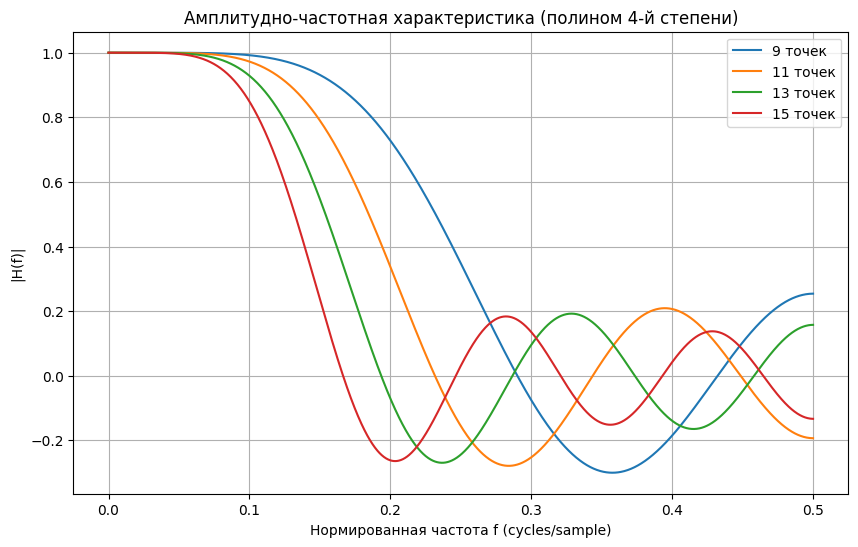

In [4]:
F = np.arange(0.0, 0.5, 0.0003)
W = 2 * np.pi * F

H9  = (1/429.0)  * (179  + 270 * np.cos(W) +  60 * np.cos(2*W) - 110 * np.cos(3*W) +  30 * np.cos(4*W))
H11 = (1/429.0)  * (143  + 240 * np.cos(W) + 120 * np.cos(2*W) -  20 * np.cos(3*W) -  90 * np.cos(4*W) + 36 * np.cos(5*W))
H13 = (1/2431.0) * (677  +1200 * np.cos(W) + 780 * np.cos(2*W) + 220 * np.cos(3*W) - 270 * np.cos(4*W) - 396 * np.cos(5*W) + 220 * np.cos(6*W))
H15 = (1/46189.0)* (11063+20250 * np.cos(W) +15000 * np.cos(2*W) +7510 * np.cos(3*W) - 330 * np.cos(4*W) - 5874 * np.cos(5*W) - 5720 * np.cos(6*W) + 4290 * np.cos(7*W))

Hs_3 = np.vstack([H9, H11, H13, H15])
labels_3 = ['9 точек', '11 точек', '13 точек', '15 точек']

plt.figure(figsize=(10, 6))
for H, label in zip(Hs_3, labels_3):
    plt.plot(F, H, label=label)

plt.title("Амплитудно-частотная характеристика (полином 4-й степени)")
plt.xlabel("Нормированная частота f (cycles/sample)")
plt.ylabel("|H(f)|")
plt.grid(True)
plt.legend()
plt.show()

## 4. Сглаживание по формулам Спенсера

Коэффициенты фильтра Спенсера для окна из 15 и 21 точки заданы эмпирически.

Фильтры Спенсера обеспечивают более плавное сглаживание и лучше подавляют высокочастотные компоненты, чем полиномиальные фильтры аналогичной длины.

Формулы свёрток

- Спенсер, 15 точек:
$$
y_n = \frac{1}{320}\big(
-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} \\
\qquad\qquad\qquad +\,67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} -5s_{n+5} -6s_{n+6} -3s_{n+7}
\big).
$$

- Спенсер, 21 точек:
$$
\begin{aligned}
y_n &= \frac{1}{350}\big(
-1s_{n-10} -3s_{n-9} -5s_{n-8} -5s_{n-7} -2s_{n-6} +6s_{n-5} +18s_{n-4} +33s_{n-3} \\
&\qquad\qquad +\,47s_{n-2} +57s_{n-1} +60s_n +57s_{n+1} +47s_{n+2} +33s_{n+3} +18s_{n+4} \\
&\qquad\qquad +\,6s_{n+5} -2s_{n+6} -5s_{n+7} -5s_{n+8} -3s_{n+9} -1s_{n+10}
\big).
\end{aligned}
$$

---

Передаточные функции

Если взять гармонический вход $s_n = e^{i\omega n}$, то выход имеет вид $y_n = H(\omega)e^{i\omega n}$. Соответственно:

- Для 15 точек (в форме экспонент):
$$
\begin{aligned}
H_{15}(\omega) &= \frac{1}{320}\big(
-3e^{-i7\omega} -6e^{-i6\omega} -5e^{-i5\omega} +3e^{-i4\omega} +21e^{-i3\omega} +46e^{-i2\omega} \\
&\qquad\qquad +\,67e^{-i\omega} +74 +67e^{i\omega}+46e^{i2\omega}+21e^{i3\omega}+3e^{i4\omega} \\
&\qquad\qquad -\,5e^{i5\omega} -6e^{i6\omega} -3e^{i7\omega}
\big).
\end{aligned}
$$

Более удобная вещественная запись:

$$
\boxed{\,H_{15}(\omega)=\frac{1}{320}\Big(74 + 2\big(67\cos\omega +46\cos2\omega +21\cos3\omega +3\cos4\omega -5\cos5\omega -6\cos6\omega -3\cos7\omega\big)\Big).\,}
$$

Через нормированную (циклическую) частоту \(f=\omega/(2\pi)\) получаем

$$
\tilde H_{15}(f) = H_{15}(2\pi f)
= \frac{1}{320}\Big(74 + 2\big(67\cos(2\pi f) +46\cos(4\pi f) +21\cos(6\pi f) +3\cos(8\pi f) -5\cos(10\pi f) -6\cos(12\pi f) -3\cos(14\pi f)\big)\Big).
$$

- Для 21 точки:
$$
\boxed{\,H_{21}(\omega)=\frac{1}{350}\Big(60 + 2\big(57\cos\omega +47\cos2\omega +33\cos3\omega +18\cos4\omega +6\cos5\omega -2\cos6\omega -5\cos7\omega -5\cos8\omega -3\cos9\omega -1\cos10\omega\big)\Big).\,}
$$

И нормированная форма:
$$
\tilde H_{21}(f) = H_{21}(2\pi f)
= \frac{1}{350}\Big(60 + 2\big(57\cos(2\pi f) +47\cos(4\pi f) +33\cos(6\pi f) +18\cos(8\pi f) +6\cos(10\pi f) \\
\qquad\qquad -\,2\cos(12\pi f) -5\cos(14\pi f) -5\cos(16\pi f) -3\cos(18\pi f) -1\cos(20\pi f)\big)\Big).
$$

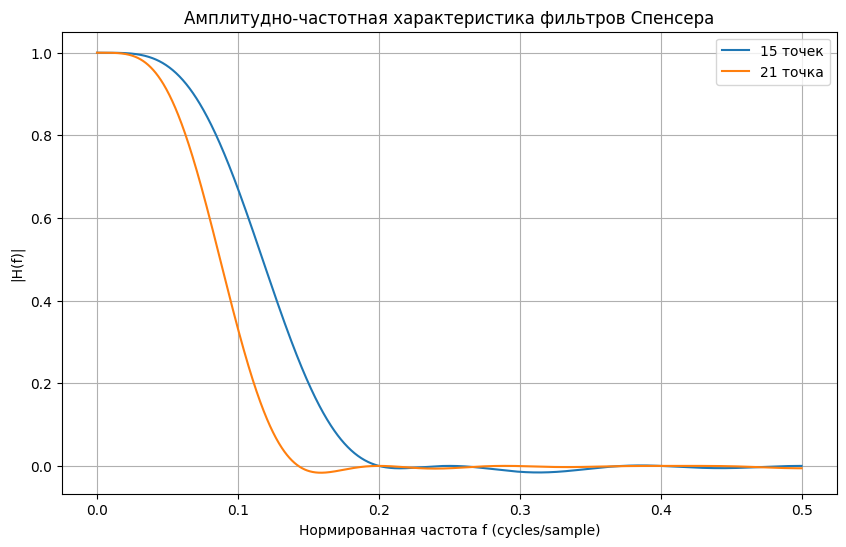

In [5]:
F = np.arange(0.0, 0.5, 0.0003)
W = 2 * np.pi * F

H15 = (1.0 / 320.0) * (
    74
    + 134 * np.cos(W)
    + 92  * np.cos(2 * W)
    + 42  * np.cos(3 * W)
    + 6   * np.cos(4 * W)
    - 10  * np.cos(5 * W)
    - 12  * np.cos(6 * W)
    - 6   * np.cos(7 * W)
)

H21 = (1.0 / 350.0) * (
    60
    + 114 * np.cos(W)
    + 94  * np.cos(2 * W)
    + 66  * np.cos(3 * W)
    + 36  * np.cos(4 * W)
    + 12  * np.cos(5 * W)
    - 4   * np.cos(6 * W)
    - 10  * np.cos(7 * W)
    - 10  * np.cos(8 * W)
    - 6   * np.cos(9 * W)
    - 2   * np.cos(10 * W)
)

Hs_4 = np.vstack([H15, H21])
labels_4 = ['15 точек', '21 точка']

# Построение (проход по строкам Hs)
plt.figure(figsize=(10, 6))
for H, label in zip(Hs_4, labels_4):
    plt.plot(F, H, label=label)

plt.title("Амплитудно-частотная характеристика фильтров Спенсера")
plt.xlabel("Нормированная частота f (cycles/sample)")
plt.ylabel("|H(f)|")
plt.grid(True)
plt.legend()
plt.show()

## 5. Логарифмические АЧХ (в дБ)

Для анализа различий в уровне затухания строятся логарифмические графики:

В логарифмическом масштабе видно, что увеличение окна усиливает затухание высоких частот — фильтр становится более «низкочастотным».

In [6]:
def to_db(H, floor_db=-80.0, eps=1e-12):
    Hmag = np.abs(H)
    ref = Hmag.max() if Hmag.max() > 0 else 1.0


    Hrel = Hmag / ref
    Hsafe = np.clip(Hrel, eps, None)
    Hdb = 20.0 * np.log10(Hsafe)
    Hdb = np.maximum(Hdb, floor_db)
    return Hdb

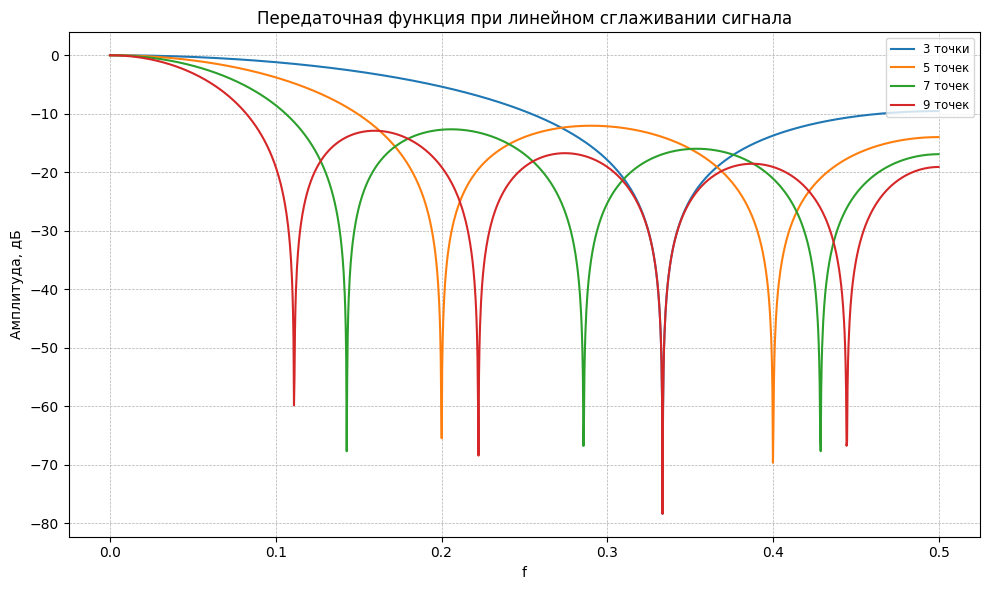

In [7]:
Hs_db = np.array([to_db(Hs_1[i], floor_db=-80.0, eps=1e-12) for i in range(Hs_1.shape[0])])

plt.figure(figsize=(10, 6))
for Hdb, lab in zip(Hs_db, labels_1):
    plt.plot(F, Hdb, label=lab)

plt.title("Передаточная функция при линейном сглаживании сигнала")
plt.xlabel("f")
plt.ylabel("Амплитуда, дБ")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

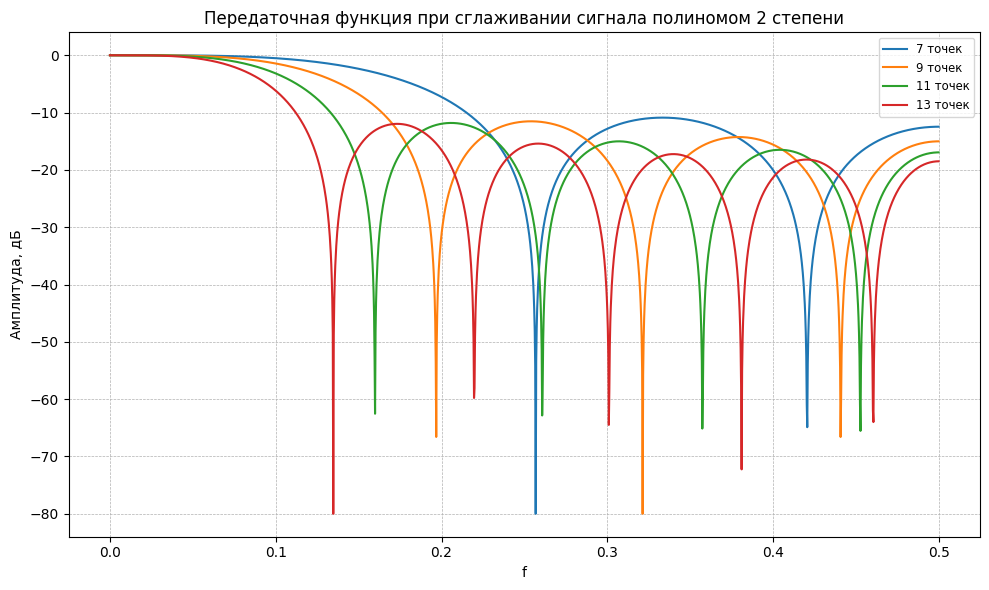

In [8]:
Hs_db = np.array([to_db(Hs_2[i], floor_db=-80.0, eps=1e-12) for i in range(Hs_2.shape[0])])

plt.figure(figsize=(10, 6))
for Hdb, lab in zip(Hs_db, labels_2):
    plt.plot(F, Hdb, label=lab)

plt.title("Передаточная функция при сглаживании сигнала полиномом 2 степени")
plt.xlabel("f")
plt.ylabel("Амплитуда, дБ")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

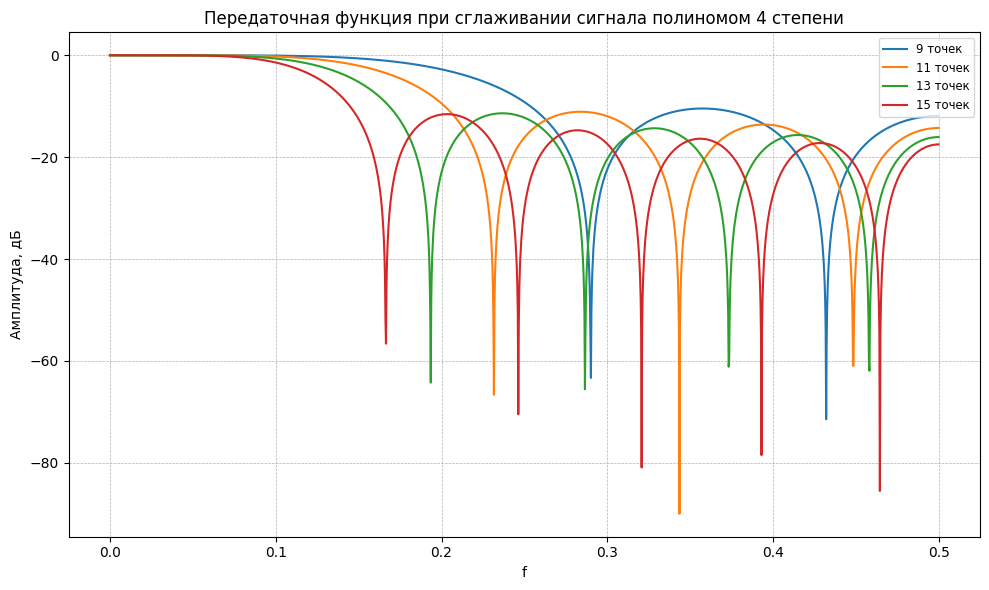

In [9]:
Hs_db = np.array([to_db(Hs_3[i], floor_db=-90.0, eps=1e-12) for i in range(Hs_3.shape[0])])

plt.figure(figsize=(10, 6))
for Hdb, lab in zip(Hs_db, labels_3):
    plt.plot(F, Hdb, label=lab)

plt.title("Передаточная функция при сглаживании сигнала полиномом 4 степени")
plt.xlabel("f")
plt.ylabel("Амплитуда, дБ")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

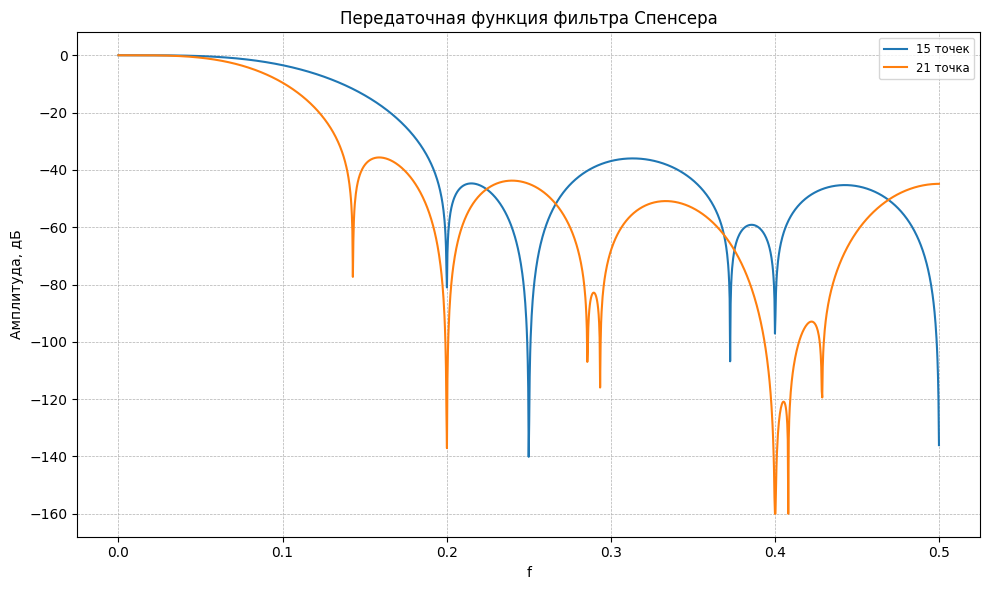

In [10]:
Hs_db = np.array([to_db(Hs_4[i], floor_db=-160.0, eps=1e-12) for i in range(Hs_4.shape[0])])

plt.figure(figsize=(10, 6))
for Hdb, lab in zip(Hs_db, labels_4):
    plt.plot(F, Hdb, label=lab)

plt.title("Передаточная функция фильтра Спенсера")
plt.xlabel("f")
plt.ylabel("Амплитуда, дБ")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

На линейном графике хорошо видны ключевые особенности передаточной характеристики: основная полоса пропускания и характерные колебания амплитуды.

В логарифмической шкале (дБ) акцент смещается на уровни затухания и подавления, что делает удобнее оценивать эффективность удаления высокочастотных компонентов.

Для рассматриваемых фильтров на логарифмических диаграммах особенно наглядно, насколько эффективно они подавляют высокочастотный шум — это важно при анализе сигналов с низким уровнем шума.

### 6. Сопоставительный анализ

Все рассмотренные фильтры ведут себя как низкочастотные:
Все рассмотренные фильтры ведут себя как низкочастотные: с ростом частоты их амплитуда падает. Они эффективно ослабляют высокочастотные составляющие и пропускают низкие, поэтому подходят для сглаживания дискретных сигналов.

При простом (линейном) сглаживании амплитуда убывает довольно плавно, но глубина подавления ВЧ невелика — примерно до −20 дБ. Полиномиальная аппроксимация второй и четвёртой степеней делает фильтры более селективными: в области высоких частот затухание усиливается, форма АЧХ усложняется, что повышает качество сглаживания.

Наиболее выраженные характеристики у фильтра Спенсера: он даёт самое сильное подавление высоких частот (порядка −40 дБ и ниже) при сохранении гладкой характеристики в низкочастотной области.

## Вывод

В ходе лабораторной работы был проведён анализ частотных характеристик нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретных сигналов различного порядка. Были получены формулы и построены амплитудно-частотные характеристики (АЧХ) фильтров для линейного, квадратичного и полиномиального сглаживания четвёртой степени, а также для фильтров по формулам Спенсера при разных размерах окон сглаживания.

На основе анализа полученных графиков установлено, что:
- Увеличение числа точек сглаживания приводит к **сужению полосы пропускания** фильтра, что усиливает подавление высокочастотных составляющих, но одновременно снижает точность передачи быстрых изменений сигнала.  
- Фильтры более высоких порядков (второй, четвёртый) имеют **более плавные характеристики** в области перехода и позволяют лучше сохранять форму сигнала при сглаживании.  
- Формулы Спенсера дают **наиболее сбалансированные частотные свойства**, обеспечивая эффективное сглаживание при минимальном искажении низкочастотных компонент.  
- Переход к логарифмическому масштабу (в дБ) позволяет нагляднее оценить степень подавления высоких частот и подтвердить различие между типами фильтров по их избирательности.  

Таким образом, в результате выполнения работы были приобретены практические навыки построения и анализа передаточных функций дискретных фильтров, а также сформировано понимание взаимосвязи между порядком полиномиального сглаживания, длиной окна усреднения и частотными свойствами фильтра.
